# DSCI 303 – Project 04
### Nathaniel Atkinson

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1: Loading the Dataset; Preliminary Analysis
The following section will load the data into a DataFrame, and explore the structure of the data set.

In [2]:
diamonds = pd.read_table('diamonds.txt', sep='\t')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


The following section will determine the size of the diamonds dataset.

In [3]:
print(diamonds.shape)

(53940, 10)


The following section inspect the distribution of the columns in diamonds.

In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Part 2: Filtering and Sorting
The following section will view information about the 5 most expensive diamonds in the dataset.

In [5]:
diamonds.loc[:,['price', 'carat', 'cut', 'color', 'clarity']].sort_values(by='price',ascending=False).head(5)

,price,carat,cut,color,clarity
27750,18823,2.29,Premium,I,VS2
27749,18818,2.00,Very Good,G,SI1
27748,18806,1.51,Ideal,G,IF
27747,18804,2.07,Ideal,G,SI2
27746,18803,2.00,Very Good,H,SI1


The following section will view information about the 5 least expensive diamonds in the dataset.

In [6]:
diamonds.loc[:,['price', 'carat', 'cut', 'color', 'clarity']].sort_values(by='price',ascending=True).head(5)

,price,carat,cut,color,clarity
1,326,0.23,Ideal,E,SI2
2,326,0.21,Premium,E,SI1
3,327,0.23,Good,E,VS1
4,334,0.29,Premium,I,VS2
5,335,0.31,Good,J,SI2


The following section will view information about the 5 largest diamonds in the dataset with an ideal cut. 

In [7]:
diamonds.loc[diamonds.loc[:,'cut']=='Ideal',['price', 'carat', 'cut', 'color', 'clarity']].sort_values(by='price',ascending=False).head(5)

,price,carat,cut,color,clarity
27748,18806,1.51,Ideal,G,IF
27747,18804,2.07,Ideal,G,SI2
27742,18791,2.15,Ideal,G,SI2
27739,18787,2.05,Ideal,G,SI1
27736,18780,1.60,Ideal,F,VS1


## Part 3: Working with Categorical Variables
The following section will create lists to specify the order for each of the three categorical variables.

In [8]:
clarity_levels = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
cut_levels = ['Fair', 'Good', 'Very Good', 'Premium','Ideal']
color_levels = ['J', 'I', 'H', 'G', 'F', 'E','D']

The following section will use these lists to communicate to Pandas the correct order for the levels of the three categorical variables.

In [9]:
diamonds.loc[:,'clarity'] = pd.Categorical(diamonds.loc[:,'clarity'],clarity_levels)
diamonds.loc[:,'color'] = pd.Categorical(diamonds.loc[:,'color'],color_levels)
diamonds.loc[:,'cut'] = pd.Categorical(diamonds.loc[:,'cut'],cut_levels)

The following section will create lists of named colors to serve as palettes to be used for visualizations later in the notebook.

In [10]:
clarity_pal = ['b','lime','r','c','m','y','darkgreen','darkorange']
cut_pal = ['b','lime','r','c','m']
color_pal = ['b','lime','r','c','m','y','darkgreen']

## Part 4: Displaying Counts for Categorical Variables
The following section will count the number of diamonds for each level of cut.

In [11]:
print(diamonds.loc[:,'cut'].value_counts().sort_index())

Fair          1610
Good          4906
Very Good    12082
Premium      13791
Ideal        21551
Name: cut, dtype: int64


The following section will count the number of diamonds for each level of color.

In [12]:
print(diamonds.loc[:,'color'].value_counts().sort_index())

J     2808
I     5422
H     8304
G    11292
F     9542
E     9797
D     6775
Name: color, dtype: int64


The following section will count the number of diamonds for each level of clarity.

In [13]:
print(diamonds.loc[:,'clarity'].value_counts().sort_index())

I1        741
SI2      9194
SI1     13065
VS2     12258
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
Name: clarity, dtype: int64


## Part 5: Scatterplots of Price Against Carat
The following section will generate a scatterplot of price against carat.

<function matplotlib.pyplot.show(close=None, block=None)>

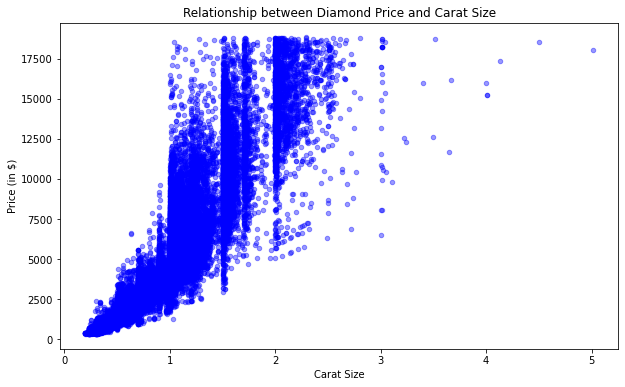

In [27]:
plt.figure(figsize=[10,6])
plt.scatter(x=(diamonds.loc[:,'carat']), y=(diamonds.loc[:,'price']),s=20, alpha=0.4,color='b')
plt.xlabel('Carat Size')
plt.ylabel('Price (in $)')
plt.title('Relationship between Diamond Price and Carat Size')
plt.show

The following section will reproduce the plot from above, but color the points according to their clarity.

<function matplotlib.pyplot.show(close=None, block=None)>

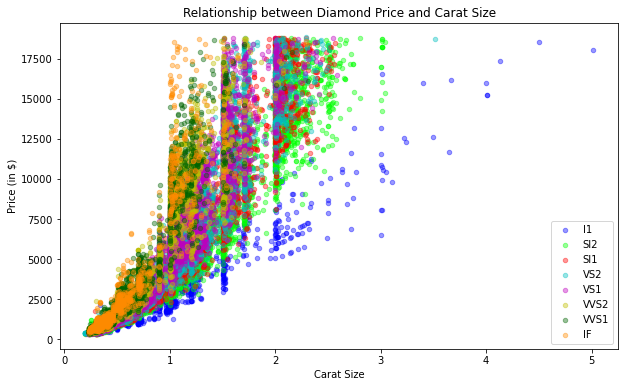

In [15]:
plt.figure(figsize=[10,6])
for i in range(len(clarity_levels)):
    plt.scatter(x=(diamonds[diamonds.loc[:,'clarity']==clarity_levels[i]].loc[:,'carat']), y=(diamonds[diamonds.loc[:,'clarity']==clarity_levels[i]].loc[:,'price']),s=20, alpha=0.4,color=clarity_pal[i],label=clarity_levels[i])
plt.legend(loc='lower right')
plt.xlabel('Carat Size')
plt.ylabel('Price (in $)')
plt.title('Relationship between Diamond Price and Carat Size')
plt.show

The following section will separate the points for each of the eight clarity levels into its own subplot.

<function matplotlib.pyplot.show(close=None, block=None)>

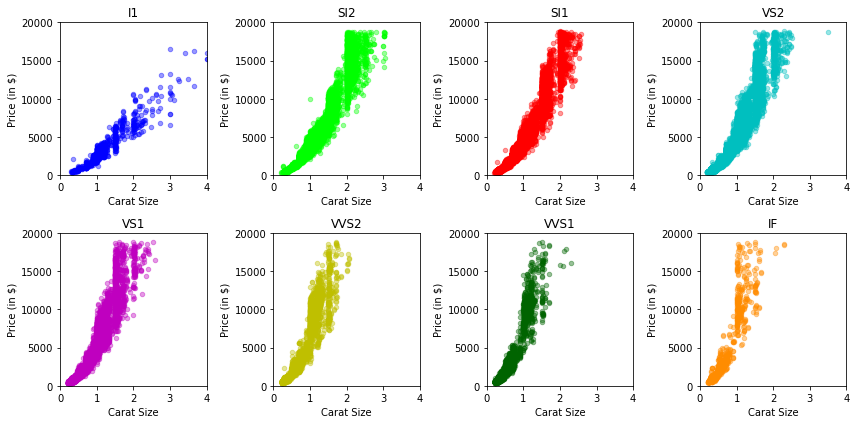

In [16]:
plt.figure(figsize=[12,6])
for i in range(len(clarity_levels)):
    plt.subplot(2,4,i+1)
    plt.scatter(x=(diamonds[diamonds.loc[:,'clarity']==clarity_levels[i]].loc[:,'carat']), y=(diamonds[diamonds.loc[:,'clarity']==clarity_levels[i]].loc[:,'price']),s=20, alpha=0.4,color=clarity_pal[i],label=clarity_levels[i])
    plt.xlim([0,4])
    plt.ylim([0,20000])
    plt.title(clarity_levels[i])
    plt.xlabel('Carat Size')
    plt.ylabel('Price (in $)')
plt.tight_layout()
plt.show

## Part 6: Applying Logarithmic Transformations
The following section will add two new columns to the diamonds in order to store the transformed variables.

In [17]:
diamonds.loc[:,'ln_carat'] = np.log(diamonds.loc[:,'carat'])
diamonds.loc[:,'ln_price'] = np.log(diamonds.loc[:,'price'])

The following section will use histograms to explore the distribution of the diamond prices, and the log of the diamond prices.

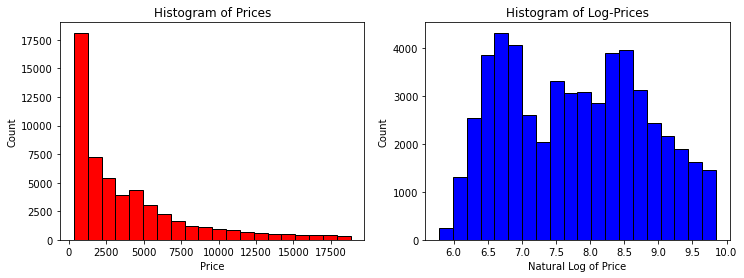

In [18]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.hist(diamonds['price'],bins=20,color='r',edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Histogram of Prices')
plt.subplot(1,2,2)
plt.hist(diamonds['ln_price'],bins=20,color='b',edgecolor='black')
plt.xlabel('Natural Log of Price')
plt.ylabel('Count')
plt.title('Histogram of Log-Prices')
plt.show()

The following section will use histograms to explore the distribution of the carat sizes, and the log of the carat sizes.

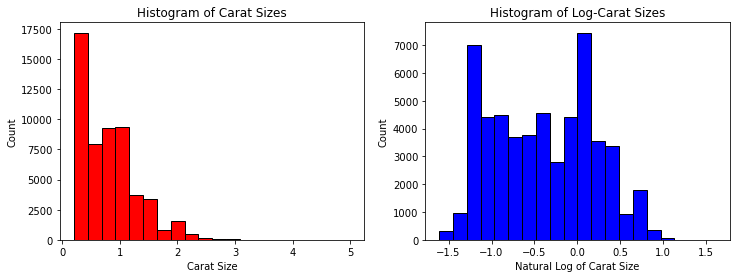

In [19]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.hist(diamonds['carat'],bins=20,color='r',edgecolor='black')
plt.xlabel('Carat Size')
plt.ylabel('Count')
plt.title('Histogram of Carat Sizes')
plt.subplot(1,2,2)
plt.hist(diamonds['ln_carat'],bins=20,color='b',edgecolor='black')
plt.xlabel('Natural Log of Carat Size')
plt.ylabel('Count')
plt.title('Histogram of Log-Carat Sizes')
plt.show()

## Part 7: Scatterplot of Transformed Variables
The following section will create a scatterplot of ln_price against ln_carat, with points colored according to their clarity.

<function matplotlib.pyplot.show(close=None, block=None)>

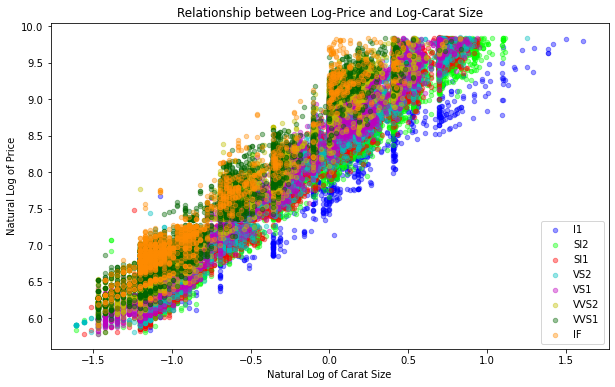

In [20]:
plt.figure(figsize=[10,6])
for i in range(len(clarity_levels)):
    plt.scatter(x=(diamonds[diamonds.loc[:,'clarity']==clarity_levels[i]].loc[:,'ln_carat']), y=(diamonds[diamonds.loc[:,'clarity']==clarity_levels[i]].loc[:,'ln_price']),s=20, alpha=0.4,color=clarity_pal[i],label=clarity_levels[i])
plt.legend(loc='lower right')
plt.xlabel('Natural Log of Carat Size')
plt.ylabel('Natural Log of Price')
plt.title('Relationship between Log-Price and Log-Carat Size')
plt.show

## Part 8: Grouping by Cut
The following section will create a grouped DataFrame displaying the mean price and carat size for each cut level. 

In [21]:
gd_cut = diamonds.loc[:,['cut','price','carat']].groupby(by='cut').mean()
gd_cut

,price,carat
cut,,
Fair,4358.757764,1.046137
Good,3928.864452,0.849185
Very Good,3981.759891,0.806381
Premium,4584.257704,0.891955
Ideal,3457.541970,0.702837


The following section will use bar charts to graphically display the information from the DataFrame above.

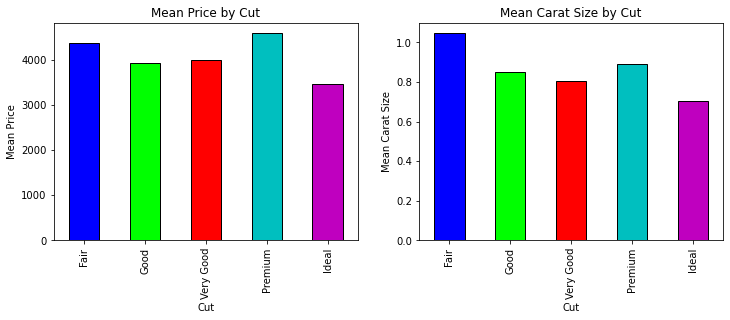

In [22]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
gd_cut.loc[:,'price'].plot.bar(color=cut_pal,edgecolor='black')
plt.xlabel('Cut')
plt.ylabel('Mean Price')
plt.title('Mean Price by Cut')

plt.subplot(1,2,2)
gd_cut.loc[:,'carat'].plot.bar(color=cut_pal,edgecolor='black')
plt.xlabel('Cut')
plt.ylabel('Mean Carat Size')
plt.title('Mean Carat Size by Cut')
plt.show()

## Part 9: Grouping by Color
The following secton will create a grouped DataFrame displaying the mean price and carat size for each color level.

In [23]:
gd_color = diamonds.loc[:,['color','price','carat']].groupby(by='color').mean()
gd_color

,price,carat
color,,
J,5323.818020,1.162137
I,5091.874954,1.026927
H,4486.669196,0.911799
G,3999.135671,0.771190
F,3724.886397,0.736538
E,3076.752475,0.657867
D,3169.954096,0.657795


The following section will use bar charts to graphically display the information from the DataFrame above. 

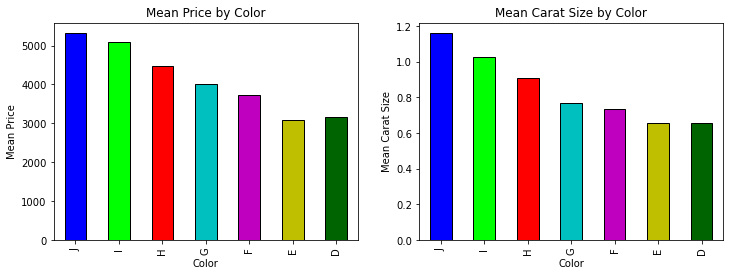

In [24]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
gd_color.loc[:,'price'].plot.bar(color=color_pal,edgecolor='black')
plt.xlabel('Color')
plt.ylabel('Mean Price')
plt.title('Mean Price by Color')

plt.subplot(1,2,2)
gd_color.loc[:,'carat'].plot.bar(color=color_pal,edgecolor='black')
plt.xlabel('Color')
plt.ylabel('Mean Carat Size')
plt.title('Mean Carat Size by Color')
plt.show()

## Part 10: Grouping by Clarity
The following section will create a grouped DataFrame displaying the mean price and carat size for each clarity level. 

In [25]:
gd_clarity = diamonds.loc[:,['clarity','price','carat']].groupby(by='clarity').mean()
gd_clarity

,price,carat
clarity,,
I1,3924.168691,1.283846
SI2,5063.028606,1.077648
SI1,3996.001148,0.850482
VS2,3924.989395,0.763935
VS1,3839.455391,0.727158
VVS2,3283.737071,0.596202
VVS1,2523.114637,0.503321
IF,2864.839106,0.505123


The following section will use bar charts to graphically display the information from the DataFrame above. 

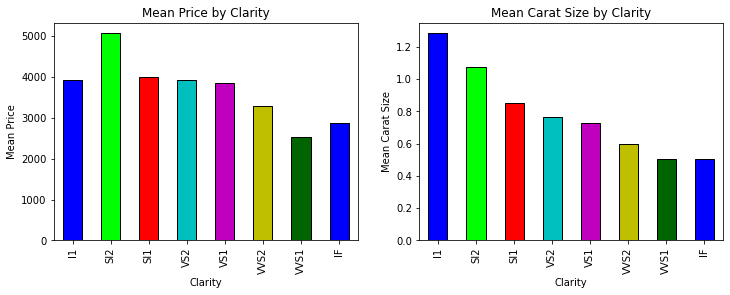

In [26]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
gd_clarity.loc[:,'price'].plot.bar(color=color_pal,edgecolor='black')
plt.xlabel('Clarity')
plt.ylabel('Mean Price')
plt.title('Mean Price by Clarity')

plt.subplot(1,2,2)
gd_clarity.loc[:,'carat'].plot.bar(color=color_pal,edgecolor='black')
plt.xlabel('Clarity')
plt.ylabel('Mean Carat Size')
plt.title('Mean Carat Size by Clarity')
plt.show()